# WeatherPy
----

## Observations
* It's important to note that there are more cities/data points in the northern hemisphere.
* Of the randomized data set, the strongest visualized correlation with proximity to the equator is temperature.
* Of the randomized data set, the weakest visualized correlation with proximity to the equator is wind speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

#Created a dictionary with empty lists for data needed for visualizations
weather_data = {
    'City': [],
    'Cloudiness': [],
    'Country': [],
    'Date': [],
    'Humidity': [],
    'Latitude': [],
    'Longitude': [],
    'Maximum Temperature': [],
    'Wind Speed': []
}

#Text to inform the for loop has started
print(f'Beginning Data Retrieval')
print(f'-----------------------------')

#Starting numbers for record and set
record = 0
set = 1

#For loop to populate empty lists in dictionary. Added a limit on API requests to avoid restrictions
for city in cities:
    response = requests.get(f'{url}appid={weather_api_key}&units={units}&q={city}').json()
    time.sleep(0.5)

    if record < 50:
        record += 1
    
    else:
        set += 1
        record = 1    
    
    try:
        weather_data['City'].append(response['name'])
        weather_data['Cloudiness'].append(response['clouds']['all'])
        weather_data['Country'].append(response['sys']['country'])
        weather_data['Date'].append(response['dt'])
        weather_data['Humidity'].append(response['main']['humidity'])
        weather_data['Latitude'].append(response['coord']['lat'])
        weather_data['Longitude'].append(response['coord']['lon'])
        weather_data['Maximum Temperature'].append(response['main']['temp_max'])
        weather_data['Wind Speed'].append(response['wind']['speed'])
            
        print(f'Processing Record {record} of Set {set} | {city}')
        
    except KeyError:
        print(f'City not found. Skipping...')
          
print(f'-----------------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tiznit
Processing Record 2 of Set 1 | puerto escondido
Processing Record 3 of Set 1 | ozark
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | tasiilaq
City not found. Skipping...
Processing Record 7 of Set 1 | belle glade
Processing Record 8 of Set 1 | turochak
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | cayenne
Processing Record 11 of Set 1 | swan river
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | williston
Processing Record 

Processing Record 3 of Set 5 | nyurba
Processing Record 4 of Set 5 | mitsamiouli
Processing Record 5 of Set 5 | anchorage
Processing Record 6 of Set 5 | riyadh
Processing Record 7 of Set 5 | santa isabel
Processing Record 8 of Set 5 | faya
Processing Record 9 of Set 5 | umm kaddadah
Processing Record 10 of Set 5 | aklavik
Processing Record 11 of Set 5 | stavern
Processing Record 12 of Set 5 | bethel
Processing Record 13 of Set 5 | clyde river
Processing Record 14 of Set 5 | kihei
Processing Record 15 of Set 5 | praia da vitoria
Processing Record 16 of Set 5 | quatre cocos
Processing Record 17 of Set 5 | ixtapa
Processing Record 18 of Set 5 | sola
Processing Record 19 of Set 5 | prince rupert
Processing Record 20 of Set 5 | hithadhoo
City not found. Skipping...
Processing Record 22 of Set 5 | ponta delgada
Processing Record 23 of Set 5 | pedernales
Processing Record 24 of Set 5 | port elizabeth
Processing Record 25 of Set 5 | kathmandu
City not found. Skipping...
Processing Record 27 of

Processing Record 10 of Set 9 | ferme-neuve
Processing Record 11 of Set 9 | dir
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 9 | grand island
Processing Record 15 of Set 9 | labuan
Processing Record 16 of Set 9 | sao filipe
Processing Record 17 of Set 9 | kibala
Processing Record 18 of Set 9 | urubicha
Processing Record 19 of Set 9 | formosa do rio preto
Processing Record 20 of Set 9 | maceio
City not found. Skipping...
Processing Record 22 of Set 9 | tautira
Processing Record 23 of Set 9 | swift current
Processing Record 24 of Set 9 | dubbo
Processing Record 25 of Set 9 | banda aceh
Processing Record 26 of Set 9 | hamilton
Processing Record 27 of Set 9 | konigswinter
Processing Record 28 of Set 9 | gap
Processing Record 29 of Set 9 | gisborne
Processing Record 30 of Set 9 | nogent-le-rotrou
City not found. Skipping...
Processing Record 32 of Set 9 | leningradskiy
Processing Record 33 of Set 9 | tutayev
Processing Record 34 of Set 9 | gainesville


Processing Record 11 of Set 13 | quang ngai
Processing Record 12 of Set 13 | alta floresta
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Created a data frame with retreived weather data
weather_df = pd.DataFrame(weather_data)

weather_df.count()

City                   562
Cloudiness             562
Country                562
Date                   562
Humidity               562
Latitude               562
Longitude              562
Maximum Temperature    562
Wind Speed             562
dtype: int64

In [5]:
#Exported weather data frame to a .csv
weather_df.to_csv
weather_df.to_csv(output_data_file, index = False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,Tiznit,44,MA,1580145602,41,29.58,-9.50,59.79,4.23
1,Puerto Escondido,5,MX,1580145603,57,15.85,-97.07,80.60,6.26
2,Ozark,90,US,1580145604,66,37.02,-93.21,52.00,4.12
3,Ancud,75,CL,1580145604,48,-41.87,-73.82,64.40,12.75
4,Tasiilaq,90,GL,1580145605,54,65.61,-37.64,30.20,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

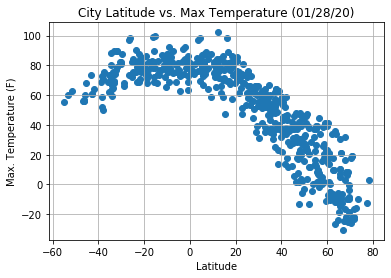

In [38]:
#Generated a scatter plot of latitude vs temperature
plt.scatter(weather_df["Latitude"], weather_df["Maximum Temperature"])

plt.title("City Latitude vs. Max Temperature (01/28/20)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('output_data/latitude_vs_max_temperature.png')

Based on the visualized data, we can see that cities closer to the equator have a warmer temperature.

#### Latitude vs. Humidity Plot

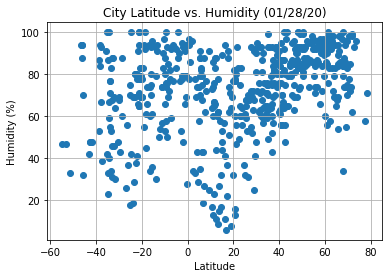

In [39]:
#Generated scatter plot of latitude vs humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])

plt.title("City Latitude vs. Humidity (01/28/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('output_data/latitude_vs_humidity.png')

Based on the visualized data, we can see that humidity does not correlate with proximity to the equator.

#### Latitude vs. Cloudiness Plot

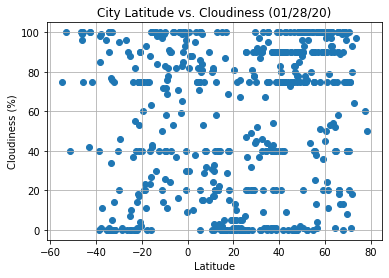

In [40]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])

plt.title("City Latitude vs. Cloudiness (01/28/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('output_data/latitude_vs_cloudiness.png')

Based on the visualized data, we can see that there is dynamic and there is no correlation with cloudiness and latitude.

#### Latitude vs. Wind Speed Plot

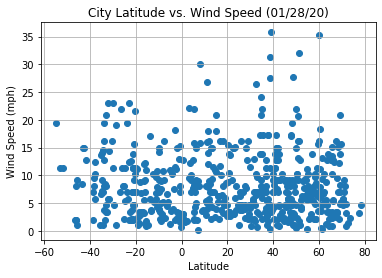

In [41]:
#Scatter plot with latitude and wind speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])

plt.title("City Latitude vs. Wind Speed (01/28/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('output_data/latitude_vs_wind_speed.png')

Based on the visualized data, we can see that wind speed is consistent across all latitudes with a few outliers in cities further from the equator.

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df['Latitude'] >= 0]
southern_hemisphere = weather_df.loc[weather_df['Latitude'] < 0]

northern_temperature = northern_hemisphere['Maximum Temperature']
southern_temperature = southern_hemisphere['Maximum Temperature']
northern_latitude = northern_hemisphere['Latitude']
southern_latitude = southern_hemisphere['Latitude']
northern_humidity = northern_hemisphere['Humidity']
southern_humidity = southern_hemisphere['Humidity']
northern_cloudiness = northern_hemisphere['Cloudiness']
southern_cloudiness = southern_hemisphere['Cloudiness']
northern_wind = northern_hemisphere['Wind Speed']
southern_wind = southern_hemisphere['Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8960568803124047


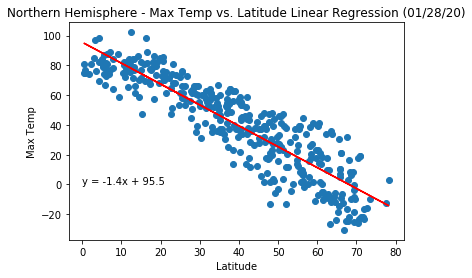

In [24]:
#Generated a scattered plot and linear regression of northern hemisphere maximum temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_temperature)
regress_values = northern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(northern_latitude, northern_temperature)
plt.plot(northern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(0,0))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (01/28/20)")

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/northern_hemisphere_max_temp_vs_latitude_linear_regression.png')

Based on the visualized data, you can see that cities near the equator are warmer from the correlation of maximum temperature and latitude in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5031945652935075


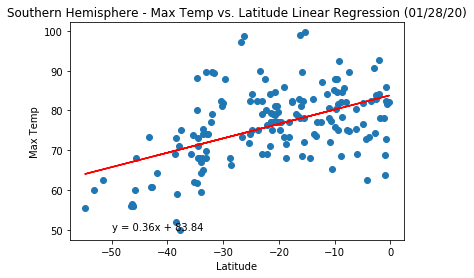

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_temperature)
regress_values = southern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(southern_latitude, southern_temperature)
plt.plot(southern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(-50,50))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (01/28/20)")

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/southern_hemisphere_max_temp_vs_latitude_linear_regression.png')

Based on the visualized data, you can see that cities near the equator are warmer from the correlation of maximum temperature and latitude in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4762936443695175


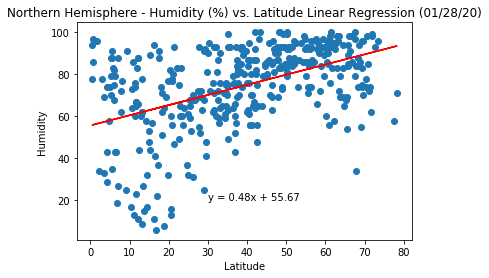

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_humidity)
regress_values = northern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(northern_latitude, northern_humidity)
plt.plot(northern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(30,20))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (01/28/20)")

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/northern_hemisphere_humidity_vs_latitude_linear_regression.png')

Based on the visualized data, you can see the correlation of humidity and latitude in the northern hemisphere. Humidity increases the further from the equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.27987384835127055


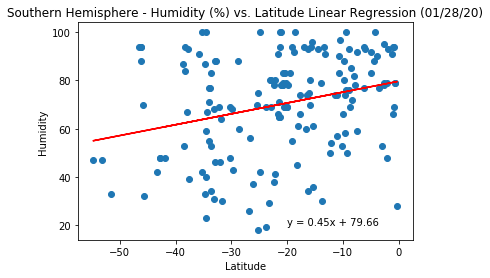

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_humidity)
regress_values = southern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(southern_latitude, southern_humidity)
plt.plot(southern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(-20,20))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (01/28/20)")

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/southern_hemisphere_humidity_vs_latitude_linear_regression.png')

Based on the visualized data, you can see the correlation of humidity and latitude in the southern hemisphere. Humidity decreases the further from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.29036183363729967


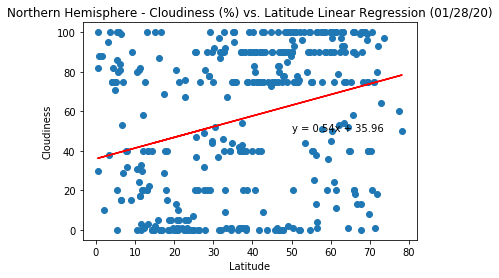

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_cloudiness)
regress_values = northern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(northern_latitude, northern_cloudiness)
plt.plot(northern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(50,50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (01/28/20)")

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/northern_hemisphere_cloudiness_vs_latitude_linear_regression.png')

Based on the visualized data, you can see the correlation of cloudiness and latitude in the northern hemisphere. Cloudiness decreases closer to the equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0960933805746798


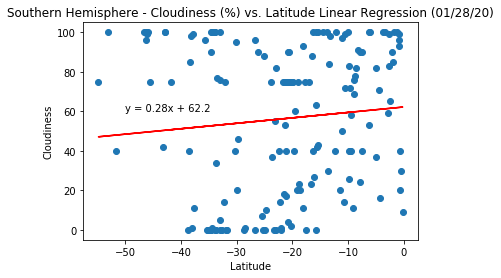

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_cloudiness)
regress_values = southern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(southern_latitude, southern_cloudiness)
plt.plot(southern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(-50,60))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (01/28/20)")

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/southern_hemisphere_cloudiness_vs_latitude_linear_regression.png')

Based on the visualized data, you can see the correlation of cloudiness and latitude in the southern hemisphere. Cloudiness increases closer to the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.05983131657633627


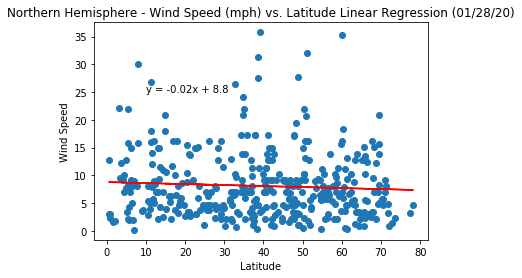

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitude, northern_wind)
regress_values = northern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(northern_latitude, northern_wind)
plt.plot(northern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(10,25))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (01/28/20)")

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/northern_hemisphere_wind_speed_vs_latitude_linear_regression.png')

Based on the visualized data, you can see the correlation of wind speed and latitude in the northern hemisphere. Wind speed slightly increases closer to the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.17046001455675264


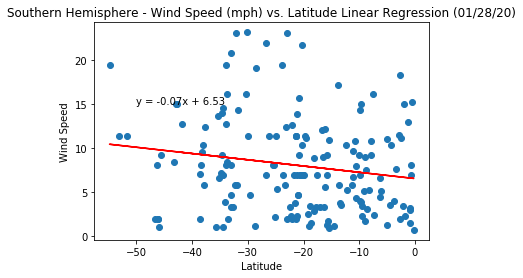

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitude, southern_wind)
regress_values = southern_latitude * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(southern_latitude, southern_wind)
plt.plot(southern_latitude, regress_values, 'r-')
plt.annotate(line_eq,(-50,15))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (01/28/20)")

print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/southern_hemisphere_wind_speed_vs_latitude_linear_regression.png')

Based on the visualized data, you can see the correlation of wind speed and latitude in the southern hemisphere. Wind speed decreases closer to the equator.